## Polinomial Regression

We will use polinomial regression to predict the salary of an employee who claims to get a salary of 160k in his previous company. But all the information that we have are some of the levels of the jobs and an estimate that he was on the level 6.5. Furthermore we observe that the normal linear model fails to predict the correct salary and polynomial regression model helps us predict the correct salary.

### Index 
- [Equation and Method](#equation)
- [Pre processing](#preprocessing)
- [Building the model](#building)
- [Result](#result)

In [1]:
# importing some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id='equation'></a>
##### Equation and Method

$Y$ = $B_{0}$ + $B_{1}$*$X_{1}^{3}$ + $B_{2}$*$X_{2}^{2}$ + ....

This can be used for cases when the graph goes in a parabolic form and then a straight line will not fit that correctly. instead, if we use a polynomial equation, we will be able to fit the data points in a curve. That is the basic idea of Polynomial regression.

###### Method

The basic method that we adopt is a combination of linear regression and multiple linear regression incorporating the polynomial terms

> 1) We first consider the degrees of polynomials upto which we want to compare our terms.

> 2) And then we make a multiple linear regression model with the newly generated polynomial terms.

> 3) The exact values of impact are selected and the model is finalized.

<a id='preprocessing'></a>
### Pre processing

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:3].values

We do not need to do feature scaling because the library does this for us and creation of dummy variables as there are no categorical variables. Also we do not perform the split into training and test set as our data is small.

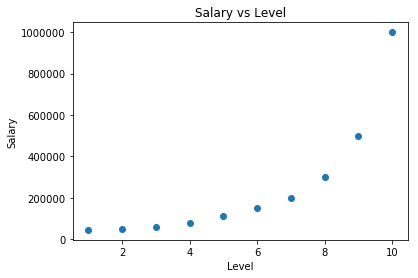

In [4]:
plt.scatter(x, y)
plt.title("Salary vs Level")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

From this simple observation, it is very clear that a simple straight line will not fit our data points correctly. So, we perform polynomial regression.

<a id='building'></a>
### Building the model

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x)
X_poly = X_poly.astype('int64')

In [8]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

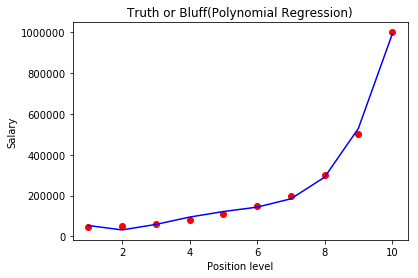

In [9]:
plt.scatter(x, y, color='red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color='blue')
plt.title("Truth or Bluff(Polynomial Regression)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

To make the graph even more smooth, we can do an even more fine step wise prediction.

In [10]:
x_fine = np.arange(min(x), max(x), 0.1)
x_fine = x_fine.reshape((len(x_fine), 1))

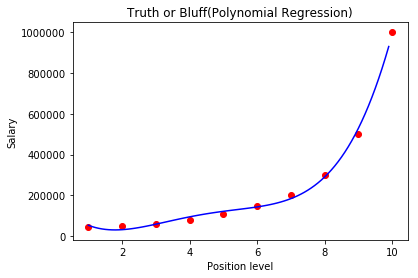

In [11]:
plt.scatter(x, y, color='red')
plt.plot(x_fine, lin_reg_2.predict(poly_reg.fit_transform(x_fine)), color='blue')
plt.title("Truth or Bluff(Polynomial Regression)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

<a id='result'></a>
### Result
Now to predict the actual salary of the employee who said that his previous salary was 160k. All that we know was we can consider his level to be 6.5. So now we need to predict his salary based on this information.

In [12]:
predicted_salary = lin_reg_2.predict(poly_reg.fit_transform(6.5))
predicted_salary[0][0]

158862.4526515617

##### It was the truth
There is only 200$ difference between the claimed and the predicted salary, so we can say that the salary claim by the employee was indeed true. This gives us conclusive evidence to hire an honest employee.